In [42]:
# CS3610 Backpropagation Assignment by Anosan J - 200040B

In [43]:
import numpy as np
import pandas as pd

In [44]:
def load_weights(layer_dims, path):
    # Initialize a list to hold the reshaped weights for each layer
    reshaped_weights = []

    # Start index for extracting weights from the CSV
    start_idx = 0

    # Iterate through layers_dims to reshape and assign the weights
    for i in range(1, len(layers_dims)):
        # Determine the number of input and output units for this layer
        input_units = layers_dims[i-1]
        output_units = layers_dims[i]

        # Extract the relevant rows for this layer
        layer_weights = np.genfromtxt(path, delimiter=',', 
                                    usecols=range(1, 1 + output_units), 
                                    skip_header=start_idx, max_rows=input_units)
        
        # Append the reshaped weights to the list
        reshaped_weights.append(layer_weights)

        # Update the start index for the next layer
        start_idx += input_units

    # Convert the list of reshaped weights to a tuple
    reshaped_weights = tuple(reshaped_weights)
    return reshaped_weights

In [45]:
def load_biases(layer_dims, path):

    # Initialize a list to hold the reshaped biases for each layer
    reshaped_biases = []

    # Start index for extracting biases from the CSV
    start_idx = 0

    # Iterate through layers_dims to reshape and assign the biases
    for i in range(1, len(layers_dims)):
        # Determine the number of output units for this layer
        output_units = layers_dims[i]

        # Extract the relevant columns for this layer (bias values)
        layer_biases = np.genfromtxt(path, delimiter=',', 
                                    usecols=range(1, 1 + output_units),
                                    skip_header=start_idx, max_rows=1)
        
        # Append the bias values to the list
        reshaped_biases.append(layer_biases)

        # Update the start index for the next layer
        start_idx += 1

    # Convert the list of reshaped biases to a tuple
    reshaped_biases = tuple(reshaped_biases)
    return reshaped_biases

In [46]:
# reshaped_weights = load_weights(layers_dims, './Assignment_1/Task_1/a/w.csv')
# reshaped_biases = load_biases(layers_dims, './Assignment_1/Task_1/a/b.csv')
def print_loaded(weights, biases):

    # Print the reshaped weights for each layer
    for i, weights in enumerate(weights):
        print(f"Shape of Weights for Layer {i + 1}:")
        print(weights.shape)
        print("\n")
        print(f"Weights for Layer {i + 1}:")
        print(weights)
        print("\n")

    # Print the reshaped biases for each layer
    for i, biases in enumerate(biases):
        print(f"Shape of Biases for Layer {i + 1}:")
        print(biases.shape)
        print("\n")
        print(f"Biases for Layer {i + 1}:")
        print(biases)
        print("\n")
    
    return

In [47]:
# Define the softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# Define activation functions
def relu(x):
    return np.maximum(0, x)

In [48]:
# Forward Pass Function
def forward_pass(data_point, weights, biases):
    num_layers = len(weights)
    
    # Initialize activations
    activations = [data_point.astype(np.float32)]
    
    # Forward pass through layers
    for layer in range(num_layers - 1):
        z = np.dot(activations[-1], weights[layer].astype(np.float32)) + biases[layer].astype(np.float32)
        a = relu(z)
        activations.append(a)
    
    # Last layer with softmax activation
    z_final = np.dot(activations[-1], weights[-1].astype(np.float32)) + biases[-1].astype(np.float32)
    a_final = softmax(z_final.T)
    activations.append(a_final)
    
    return activations

In [49]:
# Backward Pass Function
def backward_pass(activations, label_onehot, weights, biases):
    num_layers = len(weights)
    grads = []

    # Calculate gradient for the last layer
    grad_a = activations[-1].T - label_onehot
    grad_z = grad_a  # Gradient of the loss with respect to the pre-activation of the output layer
    grad_W = np.dot(grad_z.T, activations[-2])  # Gradient of the loss with respect to weights
    grad_B = np.sum(grad_z.T, axis=1, keepdims=True)  # Gradient of the loss with respect to biases
    grads.append((grad_W, grad_B))

    # Backpropagate through hidden layers
    for layer in range(num_layers - 2, -1, -1):
        grad_a = np.dot(weights[layer + 1], grad_z.T)
        grad_z = grad_a.T * (activations[layer + 1] > 0)
        grad_W = np.dot(grad_z.T, activations[layer])
        grad_B = np.sum(grad_z.T, axis=1, keepdims=True)
        grads.append((grad_W, grad_B))
    
    # Reverse the list of gradients for consistency
    grads = list(reversed(grads))

    return grads

In [50]:
# Calculate the loss (cross-entropy)
# loss = -np.log(a2[label[0]])  # Assuming label[0] is the correct class, and label_onehot was created correctly

In [51]:
def save_file(grads, output_gradient, output_bias):
    # Iterate through gradients and save them to the same CSV file
    for index, grad in enumerate(grads):
        grad_W = grad[0]
        grad_result = pd.DataFrame(grad_W.T)
        if index==0:
            grad_result.to_csv(output_gradient, index=False, header=False)
        else:
            grad_result.to_csv(output_gradient, mode='a', index=False, header=False)
    
    # Iterate through gradients and save them to the same CSV file
    for index, grad in enumerate(grads):
        grad_W = grad[1]
        grad_result = pd.DataFrame(grad_W.T)
        if index==0:
            grad_result.to_csv(output_bias, index=False, header=False)
        else:
            grad_result.to_csv(output_bias, mode='a', index=False, header=False)

In [52]:
# Input data
data_point= np.array([-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1]).reshape(-1, 14).astype(np.float32)

# One-hot encoded label
label = np.array([3]).reshape(-1, 1)
label_onehot = np.eye(4)[label.reshape(-1)].astype(np.float32)  # One-hot encoding of label 3

In [53]:
# Define the layers dimensions
layers_dims = [14, 100, 40, 4]

weights = load_weights(layers_dims, './Assignment_1/Task_1/a/w.csv')
biases = load_biases(layers_dims, './Assignment_1/Task_1/a/b.csv')

activations = forward_pass(data_point, weights, biases)
grads = backward_pass(activations, label_onehot, weights, biases)
# Define the output file path
output_gradient = './Assignment_1/Answer/dw.csv'
# Define the output file path
output_bias = './Assignment_1/Answer/db.csv'

save_file(grads, output_gradient, output_bias)

In [54]:
def run(layer_dims, file_path):
        
    weights = load_weights(layers_dims, './Assignment_1/Task_1/b/w-' + file_path)
    biases = load_biases(layers_dims, './Assignment_1/Task_1/b/b-' + file_path)

    activations = forward_pass(data_point, weights, biases)
    grads = backward_pass(activations, label_onehot, weights, biases)
    # Define the output file path
    output_gradient = './Assignment_1/Answer/b/dw-' + file_path
    # Define the output file path
    output_bias = './Assignment_1/Answer/b/db-' + file_path

    save_file(grads, output_gradient, output_bias)

In [55]:
# Define the layers dimensions
layers_dims = [14, 100, 40, 4]
test1file = '100-40-4.csv'

run(layers_dims, test1file)

In [56]:
layers_dims = [14, 28, 28, 28, 28, 28, 28, 4]
test2file = '28-6-4.csv'

run(layers_dims, test2file)

In [57]:
layers_dims = [14 for i in range(29)]
layers_dims.append(4)
test3file = '14-28-4.csv'
run(layers_dims, test3file)

In [58]:
print("Done")

Done


# Task 2

In [37]:
x_train = np.loadtxt('./Assignment_1/Task_2/x_train.csv', delimiter=',')
x_test = np.loadtxt('./Assignment_1/Task_2/x_test.csv', delimiter=',')
y_train = np.loadtxt('./Assignment_1/Task_2/y_train.csv', delimiter=',')
y_test = np.loadtxt('./Assignment_1/Task_2/y_test.csv', delimiter=',')

In [38]:
y_train = y_train.astype(int)  # Convert to integer type
y_test = y_test.astype(int)    # Convert to integer type

y_train_onehot = np.eye(4)[y_train.reshape(-1)].astype(np.float32)  # One-hot encoding of labels
y_test_onehot = np.eye(4)[y_test.reshape(-1)].astype(np.float32)    # One-hot encoding of labels

In [39]:
def compute_cost(AL, Y):
    """
    Compute the cross-entropy cost.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (number of examples, number of classes)
    Y -- true "label" vector (e.g., one-hot encoded), shape (number of examples, number of classes)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[0]  # Number of examples
    
    # Compute cross-entropy loss
    epsilon = 1e-7  # Small constant to avoid division by zero and logarithm of zero
    AL = np.clip(AL, epsilon, 1 - epsilon)  # Clip values to avoid numerical instability
    
    # Compute the cost
    cost = -1 / m * np.sum(Y * np.log(AL + epsilon) + (1 - Y) * np.log(1 - AL + epsilon))
    
    # Ensure cost is a scalar (e.g., shape ())
    cost = np.squeeze(cost)
    
    return cost

In [40]:
def compute_accuracy(predicted_labels, true_labels):
    """
    Compute the accuracy of predicted labels compared to true labels.

    Arguments:
    predicted_labels -- array of predicted labels, shape (number of examples, number of classes)
    true_labels -- array of true labels, shape (number of examples, number of classes)

    Returns:
    accuracy -- the accuracy as a percentage
    """
    
    # Compare predicted labels to true labels and count correct predictions
    correct_predictions = np.sum(np.argmax(predicted_labels, axis=1) == np.argmax(true_labels, axis=1))
    
    # Calculate accuracy as a percentage
    accuracy = (correct_predictions / true_labels.shape[0]) * 100.0
    
    return accuracy


In [41]:
# Training loop
def train_neural_network(x_train, y_train, x_test, y_test, learning_rate, num_iterations, weights, biases):

    costs = []
    train_accuracies = []
    test_accuracies = []

    for i in range(num_iterations):
        # Forward propagation
        activations = forward_pass(x_train, weights, biases)    
 
        # Compute cost
        cost = compute_cost(activations[-1], y_train.T)
        costs.append(cost)      
        # Backpropagation
        grads = backward_pass(activations, y_train, weights, biases) 
        # Update weights and biases using gradient descent
        for layer in range(len(weights)):
            biases[layer].reshape(-1, 1)
            weights[layer] -= (learning_rate * grads[layer][0].T)            
            biases[layer] -= (learning_rate * grads[layer][1].T)
        
        # Calculate training accuracy
        train_accuracy = compute_accuracy(activations[-1], y_train)
        train_accuracies.append(train_accuracy)
        
        # Forward propagation on test data
        test_activations = forward_pass(x_test, weights, biases)
        
        # Calculate test accuracy
        test_accuracy = compute_accuracy(test_activations[-1], y_test)
        test_accuracies.append(test_accuracy)
        
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
    
    return costs, train_accuracies, test_accuracies


# Initialize weights and biases (you should load them as in your original code)
# Define the layers dimensions
layers_dims = [14, 100, 40, 4]

# Define the learning rates to test
learning_rates = [1, 0.1, 0.001]

results = {}

for lr in learning_rates:
    # Reset weights and biases here if needed
    weights = list(load_weights(layers_dims, './Assignment_1/Task_1/a/w.csv'))
    biases = list(load_biases(layers_dims, './Assignment_1/Task_1/a/b.csv'))
    
    costs, train_accuracies, test_accuracies = train_neural_network(x_train, y_train_onehot, x_test, y_test_onehot, lr, num_iterations, weights, biases)
    results[lr] = {'costs': costs, 'train_accuracies': train_accuracies, 'test_accuracies': test_accuracies}

NameError: name 'num_iterations' is not defined

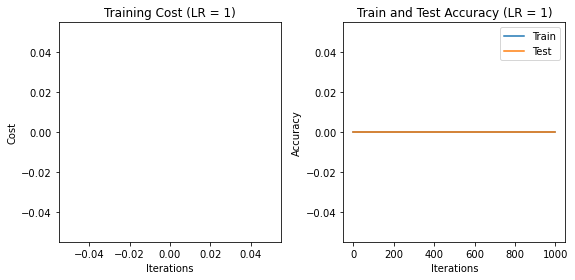

In [ ]:
from matplotlib import pyplot as plt

# Plot the results
for lr, result in results.items():
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(result['costs'])
    plt.title(f'Training Cost (LR = {lr})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    
    plt.subplot(1, 3, 2)
    plt.plot(result['train_accuracies'], label='Train')
    plt.plot(result['test_accuracies'], label='Test')
    plt.title(f'Train and Test Accuracy (LR = {lr})')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()